perform sentiment analysis (Using Naive Bayes Classifier)

In [0]:
# importing the dependencies
import numpy as np
import pickle
import collections
import nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier
import csv
from sklearn import model_selection
import random
import itertools
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

using unigrams features

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [0]:
# loading the cleaned training tweets
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [0]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [0]:
# checking the shape of the output variable
y.shape

(99989,)

In [0]:
# checking the shape of the input matrix -- this is feed into the classifier for training
X.shape

(99989, 41679)

In [0]:
# splitting into training and testing set so as to evaluate our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [0]:
# fitting the multinomial bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
# training score
clf.score(X_train,y_train)

0.821979972746934

In [0]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.7537753775377538

Confusion matrix, without normalization
[[6272 2510]
 [2414 8802]]
Normalized confusion matrix
[[0.71 0.29]
 [0.22 0.78]]


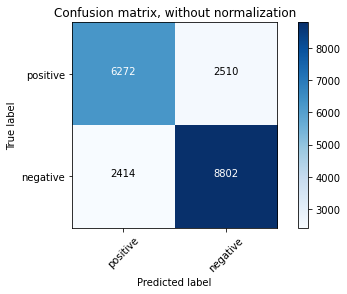

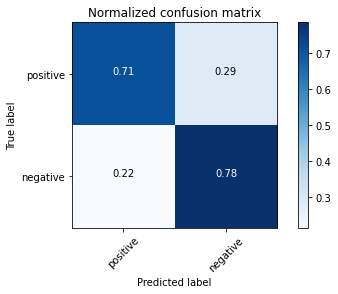

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
# finally loading the cleaned test tweets on which we have to do sentiment analysis and report to kaggle
with open('/content/drive/My Drive/a/sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_test=vectorizer.transform(SentimentText)

In [0]:
# checking the shape
X_test.shape

(299989, 41679)

In [0]:
# predicting the sentiments using trained classifier
predicted = clf.predict(X_test)

In [0]:
# shape of the predicted 
predicted.shape

(299989,)

In [0]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('/content/drive/My Drive/a/data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using bigrams features

In [0]:
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X=bigram_vectorizer.fit_transform(SentimentText)

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [0]:
X.shape

(99989, 428766)

In [0]:
y.shape

(99989,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:

# training score
clf.score(X_train, y_train)

0.9352552162118238

In [0]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.9336433643364337

Confusion matrix, without normalization
[[ 8111   671]
 [  656 10560]]
Normalized confusion matrix
[[0.92 0.08]
 [0.06 0.94]]


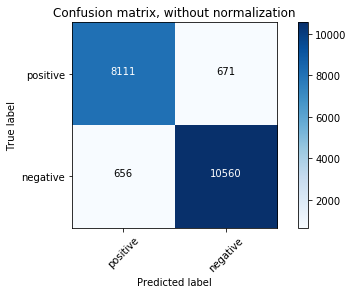

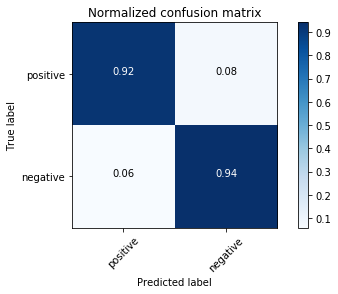

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_test=bigram_vectorizer.transform(SentimentText)

In [0]:
X_test.shape

(299989, 428766)

In [0]:
predicted = clf.predict(X_test)

In [0]:
predicted.shape

(299989,)

In [0]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('/content/drive/My Drive/a/data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using both unigrams and bigrams as features set

In [0]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)

In [0]:
X_unigrams.shape

(99989, 41679)

In [0]:
X_bigrams.shape

(99989, 428766)

In [0]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams])

In [0]:
X_combined.shape

(99989, 470445)

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [0]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# training score
clf.score(X_train,y_train)

0.9195159455438737

In [0]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

Confusion matrix, without normalization
[[6639 2143]
 [2466 8750]]
Normalized confusion matrix
[[0.76 0.24]
 [0.22 0.78]]


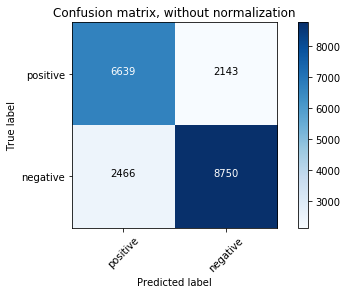

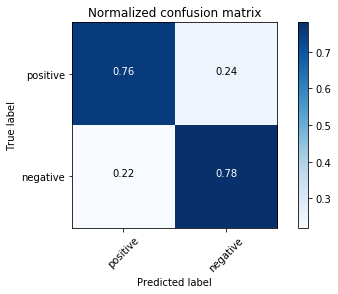

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)

In [0]:
X_test_unigrams.shape

(299989, 41679)

In [0]:
X_test_bigrams.shape

(299989, 428766)

In [0]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams])

In [0]:
X_test_combined.shape

(299989, 470445)

In [0]:
predicted = clf.predict(X_test_combined)

In [0]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('/content/drive/My Drive/a/data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)